In [1]:
from mu2e import mu2e_ext_path
from mu2e.dataframeprod import g4root_to_df
from root_pandas import read_root
import pandas as pd
from mu2e.mu2eplots import mu2e_plot3d_ptrap
from mu2e.mu2eplots import mu2e_plot3d_ptrap_traj
from mu2e.mu2eplots import mu2e_plot3d_ptrap_anim
import mu2e.mu2eplots as mplt
import six.moves.cPickle as pkl
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
mu2e_data_path = '/Volumes/DataDump/Mu2E/'
from skhep.visual import MplPlotter as splt
from matplotlib.colors import LogNorm
pd.set_option("display.max_columns",50)
from matplotlib.colors import LightSource, Normalize

Welcome to JupyROOT 6.12/06


<IPython.core.display.Javascript object>

In [2]:
# Get pions, make a subset df of matching pions and muons
df = read_root(mu2e_data_path+'pions-cd3-s2/nts.bpollack.pions_Mau12_stage1_vd.v656.combined.root')
#df_trimmed = pd.read_pickle(mu2e_data_path+'pions-cd3-s2/nts.bpollack.pions_Mau12_stage1_vd.v656.trimmed.p')
#df_ntpart, _, df_ntvd = g4root_to_df(mu2e_data_path+'pion-st-full-Mau13-g4s2/nts.bpollack.pions_Mau12_stage1_vd.v656.combined_1',
#                                      do_basic_modifications=True, trees=['part', 'vd'])
#df_ntpart.set_index(['run', 'subrun', 'evt'], inplace=True)

# df_mu_and_pi = df_ntpart.loc[df_ntpart.query('pdg==-211').index]
# df_mu_and_pi = df_mu_and_pi.loc[df_mu_and_pi.query('pdg==13').index]

In [3]:
df['tw'] = np.exp(-df.tau)

In [ ]:
#df_trimmed2 = df.query('hits_pmag>70 and hits_pz>0')

In [ ]:
#df_trimmed_full = df_trimmed.append(df_trimmed2, ignore_index=True)

In [6]:
#df_trimmed_full.to_pickle(mu2e_data_path+'pions-cd3-s2/nts.bpollack.pions_Mau12_stage1_vd.v656.trimmed.p')
df = df.query('hits_pz>0')

In [7]:
df_zoom = df.query('hits_pmag>90')

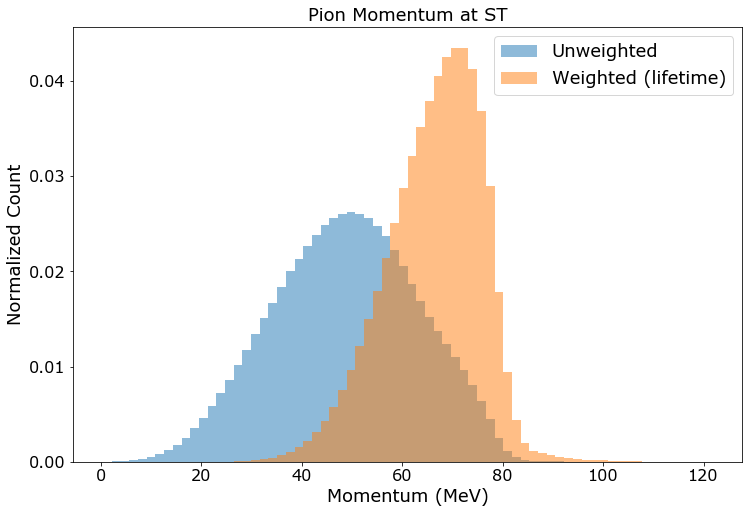

In [6]:
_ = splt.hist(df.hits_pmag, bins=70, normed=True, label='Unweighted')
#plt.figure()
_ = splt.hist(df.hits_pmag, bins=70, weights=df.tw, label='Weighted (lifetime)', normed=True)
plt.title('Pion Momentum at ST')
plt.xlabel('Momentum (MeV)')
plt.ylabel('Normalized Count')
plt.legend()
plt.savefig('plots_tmp/pion_mom_st.pdf')

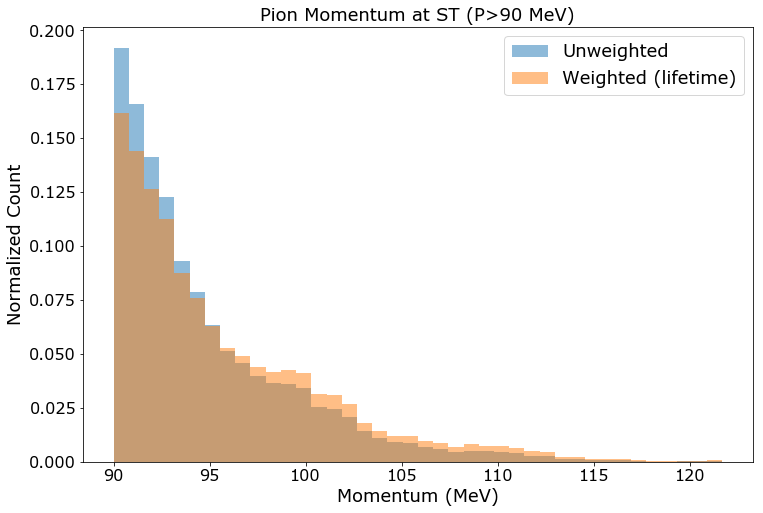

In [11]:
_ = splt.hist(df_zoom.hits_pmag, bins=40, normed=True, label='Unweighted')
#plt.figure()
_ = splt.hist(df_zoom.hits_pmag, bins=40, weights=df_zoom.tw, label='Weighted (lifetime)', normed=True)
plt.title('Pion Momentum at ST (P>90 MeV)')
plt.xlabel('Momentum (MeV)')
plt.ylabel('Normalized Count')
plt.legend()
plt.savefig('plots_tmp/pion_mom_st_zoom.pdf')

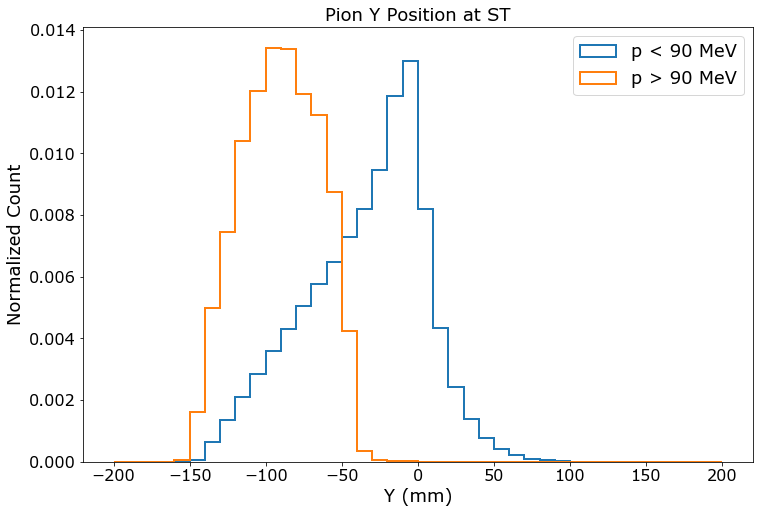

In [22]:
_ = splt.hist(df.query('hits_pmag<90').hits_y, bins=40, weights=df.query('hits_pmag<90').tw, normed=True, label='p < 90 MeV', histtype='step', range=(-200,200))
#plt.figure()
_ = splt.hist(df_zoom.hits_y, bins=40, weights=df_zoom.tw, label='p > 90 MeV', normed=True, histtype='step', range=(-200,200))
plt.title('Pion Y Position at ST')
plt.xlabel('Y (mm)')
plt.ylabel('Normalized Count')
plt.legend()
plt.savefig('plots_tmp/pion_ypos_st.pdf')

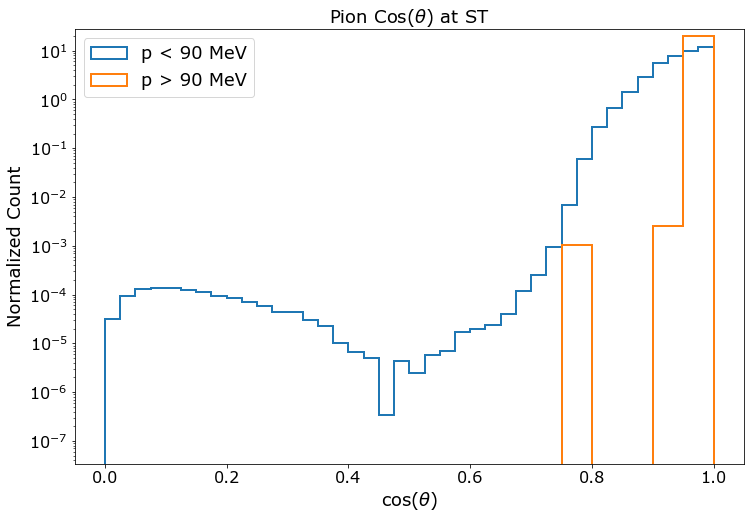

In [8]:
_ = splt.hist(df.query('hits_pmag<90').hits_pz/df.query('hits_pmag<90').hits_pmag, bins=40, weights=df.query('hits_pmag<90').tw, normed=True, label='p < 90 MeV', histtype='step', range=(0,1), log=True)
#plt.figure()
_ = splt.hist(df_zoom.hits_pz/df_zoom.hits_pmag, bins=20, weights=df_zoom.tw, label='p > 90 MeV', normed=True, histtype='step', range=(0,1), log=True)
plt.title(r'Pion Cos($\theta$) at ST')
plt.xlabel(r'cos($\theta$)')
plt.ylabel('Normalized Count')
plt.legend(loc=2)
plt.savefig('plots_tmp/pion_cosz_st.pdf')

In [15]:
print(df_zoom.query('hits_time>150').tw.sum())
print(df_zoom.query('hits_time<150').tw.sum())

0.20200557
840.8589


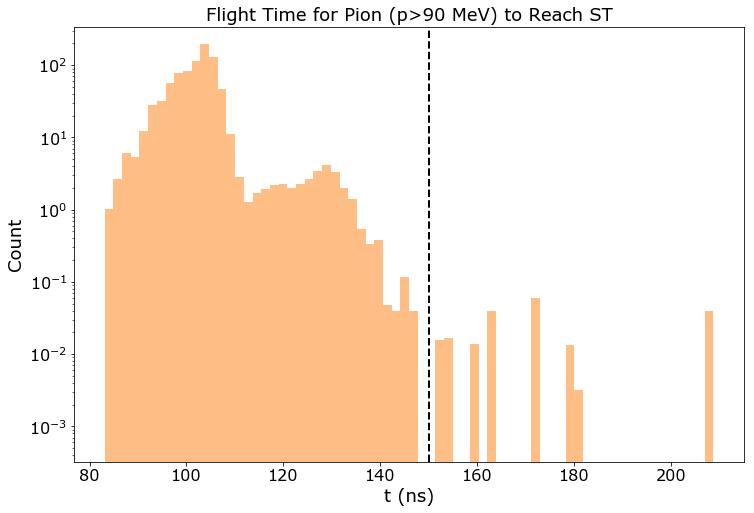

In [13]:
_ = splt.hist(df_zoom.query('hits_time<700').hits_time, bins=70, weights=df_zoom.query('hits_time<700').tw, label='Weighted (lifetime)', log=True, color='C1')
plt.title('Flight Time for Pion (p>90 MeV) to Reach ST')
plt.xlabel('t (ns)')
plt.ylabel('Count')
plt.gca().axvline(150, linestyle='--', linewidth=2, color='k')
plt.savefig('plots_tmp/s0_time.pdf')

In [ ]:
_ = splt.hist(df.query('hits_pmag>80').hits_time, bins=50, normed=True, label='Unweighted', log=True)
#plt.figure()
_ = splt.hist(df.query('hits_pmag>80').hits_time, bins=50, weights=df.query('hits_pmag>80').tw, label='Weighted (lifetime)', normed=True, log=True)
plt.title('Global Time at ST (p>80 MeV)')
plt.xlabel('t (ns)')
plt.ylabel('Normalized Count')
plt.legend()

In [ ]:
df.query('hits_time<700').tw.sum()

In [ ]:
df.query('hits_pmag>80 and hits_time>190').tw.sum()/df.query('hits_pmag>80 and hits_time<190').tw.sum()

In [ ]:
splt.hist(df.query('hits_pmag>55').tau, log=True)
plt.title('Tau, p_pion>55 at ST')
plt.xlabel('tau (ns)')

In [ ]:
splt.hist(df.query('hits_pmag>55').hits_time, log=True)
plt.title('Total time, p_pion>55 at ST')
plt.xlabel('time (ns)')

In [ ]:
splt.hist(df.query('hits_pmag>55').hits_pz, bins=65, range=(-130,130), label='pz')
splt.hist(df.query('hits_pmag>55').hits_px, bins=65, range=(-130,130), label='px')
splt.hist(df.query('hits_pmag>55').hits_py, bins=65, range=(-130,130), label='py')
plt.title('Momentum, p_pion>55 at ST')
plt.xlabel('MeV')

In [ ]:
splt.hist(df.query('hits_pmag>55').hits_pz/df.query('hits_pmag>55').hits_pmag, log=True)
plt.title('cos(z), p_pion>55 at ST')
plt.xlabel('cos(z)')

In [ ]:
plt.hexbin?

In [ ]:
plt.hexbin(df.hits_x, df.hits_y)
plt.colorbar()
plt.title('Position for All Pions at ST')
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')

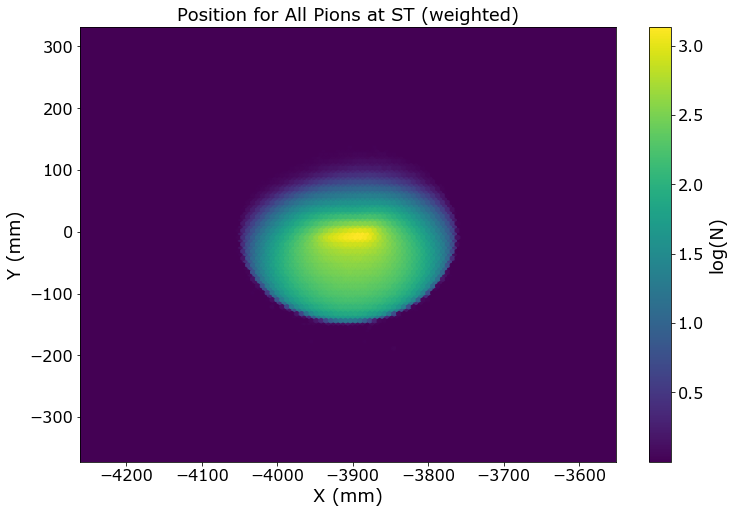

In [18]:
plt.hexbin(df.hits_x, df.hits_y, C=df.tw, reduce_C_function=np.sum, bins='log')
cb = plt.colorbar()
plt.title('Position for All Pions at ST (weighted)')
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
cb.set_label('log(N)')
cmap = matplotlib.cm.get_cmap('viridis')
rgba = cmap(0.0)
ax = plt.gca()
ax.set_facecolor(rgba)
plt.savefig('plots_tmp/pion_pos_st_heat.pdf')

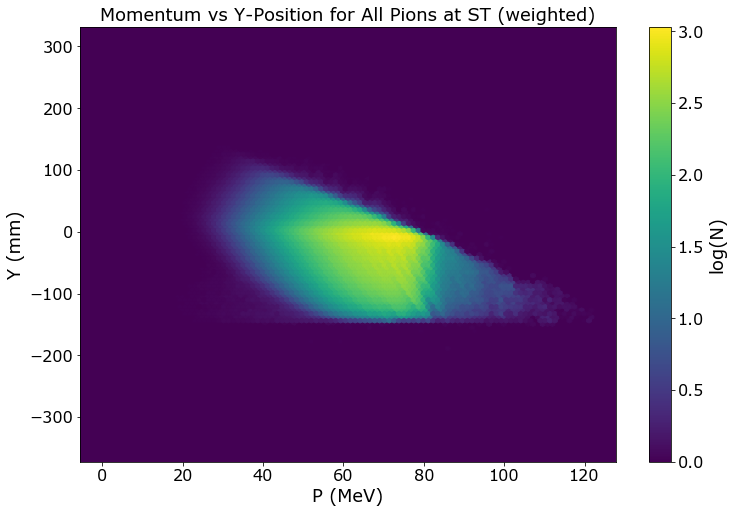

In [19]:
plt.hexbin(df.hits_pmag, df.hits_y, C=df.tw, reduce_C_function=np.sum, bins='log')
cb = plt.colorbar()
plt.title('Momentum vs Y-Position for All Pions at ST (weighted)')
plt.xlabel('P (MeV)')
plt.ylabel('Y (mm)')
cb.set_label('log(N)')
cmap = matplotlib.cm.get_cmap('viridis')
rgba = cmap(0.0)
ax = plt.gca()
ax.set_facecolor(rgba)
plt.savefig('plots_tmp/pion_mompos_st_heat.pdf')

In [ ]:
plt.hexbin(df.hits_pmag, df.hits_x, bins='log')
plt.colorbar()
plt.title('Mom vs X-Pos (log scale)')
plt.xlabel('p (MeV)')
plt.ylabel('X (mm)')

In [ ]:
plt.hexbin(df.query('hits_pmag>55').hits_pmag, df.query('hits_pmag>55').hits_time, bins='log')
plt.colorbar()
plt.title('Mom vs Time (log scale)')
plt.xlabel('p (MeV)')
plt.ylabel('t (ns)')

In [ ]:
plt.hexbin(df.query('hits_pmag>55').hits_pmag, df.query('hits_pmag>55').hits_pz/df.query('hits_pmag>55').hits_pmag, bins='log')
plt.colorbar()
plt.title('Mom vs Cos(z) (log scale)')
plt.xlabel('p (MeV)')
plt.ylabel('cos(z)')

In [ ]:
plt.hexbin(df.hits_pmag, df.tau, bins='log')
plt.colorbar()
plt.title('Mom vs Tau (log scale)')
plt.xlabel('p (MeV)')
plt.ylabel('t (ns)')

In [ ]:
def mean2(a):
    if len(a) is 0: return 1e-15
    else: return np.mean(a)

In [ ]:
df_trimmed.to_csv(mu2e_data_path+'pions-cd3-s2/st_pions_70MeV.txt', columns=['hits_px', 'hits_py', 'hits_pz', 'hits_x','hits_y','hits_z','tau'], header=None, sep=' ', index=False)